In [1]:
from Pylette import extract_colors
import glob
import os
import pandas as pd
import numpy as np
import cv2

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.cm as cm

In [3]:
import ast
import re

In [4]:
os.chdir("..")

In [5]:
image_palettes = pd.DataFrame([],
        columns=['Style', 'Artist', 'Art Name', 'filename', 'Palette', 'Width', 'Height'])

In [6]:
image_palettes = pd.read_excel("data/painting_classes.xlsx")
image_palettes['Palette'] = [np.fromstring(re.sub(r'[\[\]]', '', image_palettes.loc[i]['Palette']), sep=' ').reshape(-1, 3) for i in image_palettes.index]
image_palettes = image_palettes.drop(columns=['Unnamed: 0'])
image_palettes

,Style,Artist,Art Name,filename,Palette,Width,Height
0,Baroque,Adriaen Brouwer,A Boor Asleep,.\data\Baroque\adriaen-brouwer_a-boor-asleep.jpg,"[[36.0, 25.0, 20.0], [56.0, 38.0, 32.0], [148....",712.0,950.0
1,Baroque,Adriaen Brouwer,Drinkers In The Yard,.\data\Baroque\adriaen-brouwer_drinkers-in-the...,"[[159.0, 154.0, 135.0], [151.0, 145.0, 128.0],...",2024.0,2461.0
2,Baroque,Adriaen Brouwer,Dune Landscape By Moonlight,.\data\Baroque\adriaen-brouwer_dune-landscape-...,"[[27.0, 16.0, 19.0], [42.0, 21.0, 23.0], [60.0...",712.0,513.0
3,Baroque,Adriaen Brouwer,Farmers Fight Party,.\data\Baroque\adriaen-brouwer_farmers-fight-p...,"[[83.0, 55.0, 38.0], [61.0, 43.0, 33.0], [104....",1272.0,960.0
4,Baroque,Adriaen Brouwer,Father S Of Unpleasant Duties 1631,.\data\Baroque\adriaen-brouwer_father-s-of-unp...,"[[59.0, 66.0, 73.0], [80.0, 81.0, 85.0], [28.0...",774.0,1189.0
...,...,...,...,...,...,...,...
47181,High_Renaissance,Vittore Carpaccio,The Virgin Reading 1510,.\data\High_Renaissance\vittore-carpaccio_the-...,"[[37.0, 27.0, 24.0], [168.0, 171.0, 169.0], [6...",646.0,1000.0
47182,High_Renaissance,Vittore Carpaccio,Three Studies Of A Cavalier In Armor,.\data\High_Renaissance\vittore-carpaccio_thre...,"[[165.0, 184.0, 192.0], [151.0, 170.0, 184.0],...",1809.0,1900.0
47183,High_Renaissance,Vittore Carpaccio,Two Venetian Ladies,.\data\High_Renaissance\vittore-carpaccio_two-...,"[[43.0, 34.0, 35.0], [67.0, 41.0, 42.0], [194....",2536.0,3810.0
47184,High_Renaissance,Vittore Carpaccio,Virgin Mary And John The Baptist Praying To Th...,.\data\High_Renaissance\vittore-carpaccio_virg...,"[[79.0, 47.0, 48.0], [50.0, 36.0, 38.0], [214....",2536.0,3207.0


In [9]:
def getPaintingOrientation(img_width, img_height):
    orient = None

    if img_width is None or img_height is None:
        return None
    
    if img_width == img_height:
        orient = 'Box'
    elif img_width > img_height:
        orient = 'Landscape'
    elif img_width < img_height:
        orient = 'Portrait'

    return orient

def getPaintingArea(img_width, img_height):
    area = None

    if img_width is None or img_height is None:
        return None
    
    return img_width * img_height

In [10]:
image_palettes['Orientation'] = [getPaintingOrientation(image_palettes.loc[i]['Width'], image_palettes.loc[i]['Height']) for i in image_palettes.index]
image_palettes['Area'] = [getPaintingArea(image_palettes.loc[i]['Width'], image_palettes.loc[i]['Height']) for i in image_palettes.index]

In [11]:
image_palettes

,Style,Artist,Art Name,filename,Palette,Width,Height,Orientation,Area
0,Baroque,Adriaen Brouwer,A Boor Asleep,.\data\Baroque\adriaen-brouwer_a-boor-asleep.jpg,"[[36.0, 25.0, 20.0], [56.0, 38.0, 32.0], [148....",712.0,950.0,Portrait,676400.0
1,Baroque,Adriaen Brouwer,Drinkers In The Yard,.\data\Baroque\adriaen-brouwer_drinkers-in-the...,"[[159.0, 154.0, 135.0], [151.0, 145.0, 128.0],...",2024.0,2461.0,Portrait,4981064.0
2,Baroque,Adriaen Brouwer,Dune Landscape By Moonlight,.\data\Baroque\adriaen-brouwer_dune-landscape-...,"[[27.0, 16.0, 19.0], [42.0, 21.0, 23.0], [60.0...",712.0,513.0,Landscape,365256.0
3,Baroque,Adriaen Brouwer,Farmers Fight Party,.\data\Baroque\adriaen-brouwer_farmers-fight-p...,"[[83.0, 55.0, 38.0], [61.0, 43.0, 33.0], [104....",1272.0,960.0,Landscape,1221120.0
4,Baroque,Adriaen Brouwer,Father S Of Unpleasant Duties 1631,.\data\Baroque\adriaen-brouwer_father-s-of-unp...,"[[59.0, 66.0, 73.0], [80.0, 81.0, 85.0], [28.0...",774.0,1189.0,Portrait,920286.0
...,...,...,...,...,...,...,...,...,...
47181,High_Renaissance,Vittore Carpaccio,The Virgin Reading 1510,.\data\High_Renaissance\vittore-carpaccio_the-...,"[[37.0, 27.0, 24.0], [168.0, 171.0, 169.0], [6...",646.0,1000.0,Portrait,646000.0
47182,High_Renaissance,Vittore Carpaccio,Three Studies Of A Cavalier In Armor,.\data\High_Renaissance\vittore-carpaccio_thre...,"[[165.0, 184.0, 192.0], [151.0, 170.0, 184.0],...",1809.0,1900.0,Portrait,3437100.0
47183,High_Renaissance,Vittore Carpaccio,Two Venetian Ladies,.\data\High_Renaissance\vittore-carpaccio_two-...,"[[43.0, 34.0, 35.0], [67.0, 41.0, 42.0], [194....",2536.0,3810.0,Portrait,9662160.0
47184,High_Renaissance,Vittore Carpaccio,Virgin Mary And John The Baptist Praying To Th...,.\data\High_Renaissance\vittore-carpaccio_virg...,"[[79.0, 47.0, 48.0], [50.0, 36.0, 38.0], [214....",2536.0,3207.0,Portrait,8132952.0


In [14]:
import seaborn as sns

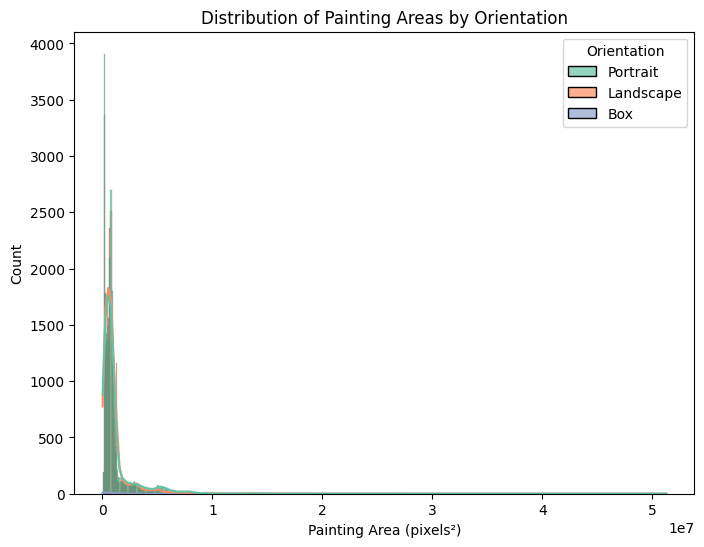

In [16]:
# Plot Histogram (Distribution of Area by Orientation)
plt.figure(figsize=(8,6))
sns.histplot(image_palettes, x="Area", hue="Orientation", bins=500, kde=True, palette="Set2", alpha=0.7)
plt.xlabel("Painting Area (pixels²)")
plt.ylabel("Count")
plt.title("Distribution of Painting Areas by Orientation")
plt.show()

In [7]:
style_palettes = pd.DataFrame([], columns=['Style'])
style_palettes['Style'] = image_palettes['Style'].unique()

C:\Users\naimi\AppData\Local\Temp\ipykernel_30224\1521608664.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('tab10', num_classes)  # 'tab10', 'tab20', or 'viridis' for variety


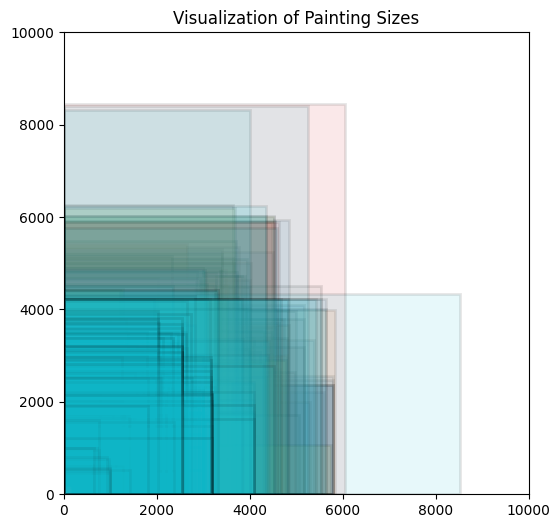

In [8]:
fig, ax = plt.subplots(figsize=(6, 6))

# Generate 14 distinct colors from a colormap
num_classes = len(image_palettes['Style'].unique())
colormap = cm.get_cmap('tab10', num_classes)  # 'tab10', 'tab20', or 'viridis' for variety
style_viz_df = style_palettes.copy()
style_viz_df['Color map'] = [colormap(i)[:3] for i in range(num_classes)]

# Draw each rectangle
for i in image_palettes.index:
    x = 0
    y = 0
    w = image_palettes.loc[i]['Width']
    h = image_palettes.loc[i]['Height']
    color_face = style_viz_df[style_viz_df['Style'] == image_palettes.loc[i]['Style']].iloc[-1]['Color map']
    rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='black', facecolor=color_face, alpha = 0.1)
    ax.add_patch(rect)

ax.set_xlim(0, 10000)
ax.set_ylim(0, 10000)
# ax.set_aspect('equal')
# plt.gca().invert_yaxis()  # Invert y-axis to match usual painting orientation
plt.title("Visualization of Painting Sizes")
plt.show()